In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 

parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

In [2]:
type(data)

dict

In [3]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [35]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9791,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19185493.00000,19185493.00000,NaN,1,NaN,NaN,None,2022-10-21T15:58:00.000Z,19087.15997,32474132885.58323,41.50970,0.36731,-0.95644,-1.44324,-0.65971,-10.82839,-13.96116,366196574010.33044,40.12310,400830359387.53003,None,2022-10-21T15:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-21 13:58:37.614178
1,1027,Ethereum,ETH,ethereum,6144,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373863.49900,122373863.49900,NaN,2,NaN,NaN,None,2022-10-21T15:58:00.000Z,1287.29330,10946296502.66349,27.12380,0.38142,-1.11465,-1.82607,-4.20466,-19.00273,-15.35757,157531054640.20529,17.26020,157531054640.20999,None,2022-10-21T15:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-21 13:58:37.614178
2,825,Tether,USDT,tether,41126,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,68452659679.34373,70146125803.79471,NaN,3,NaN,NaN,None,2022-10-21T15:58:00.000Z,0.99999,42042913666.74677,32.92890,0.00136,-0.00028,-0.00768,-0.01316,-0.00207,-0.00208,68452254274.53845,7.49710,70145710369.59000,None,2022-10-21T15:58:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-10-21 13:58:37.614178
3,3408,USD Coin,USDC,usd-coin,6575,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,43810335217.47533,43810335217.47533,NaN,4,NaN,NaN,None,2022-10-21T15:58:00.000Z,1.00003,3239172947.18203,20.92960,-0.00631,0.00030,0.00951,0.00047,-0.00862,0.03380,43811488194.17968,4.80050,43811488194.18000,None,2022-10-21T15:58:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-10-21 13:58:37.614178
4,1839,BNB,BNB,bnb,1129,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,159981007.76266,159981007.76266,NaN,5,NaN,NaN,None,2022-10-21T15:58:00.000Z,269.12165,625697758.77824,20.47000,0.29825,-1.26033,-0.81060,0.65352,-10.00641,5.02706,43054353444.98863,4.71730,53824330834.15000,None,2022-10-21T15:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-21 13:58:37.614178
5,52,XRP,XRP,xrp,827,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,49887015710.00000,99989258607.00000,NaN,6,NaN,NaN,None,2022-10-21T15:58:00.000Z,0.44649,2020917414.19388,49.44710,0.14046,-3.28350,-9.32545,12.94457,32.17107,25.98654,22274155366.52116,2.44050,44649203905.09000,None,2022-10-21T15:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-21 13:58:37.614178
6,4687,Binance USD,BUSD,binance-usd,5315,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,21628100610.95000,21628100610.95000,NaN,7,NaN,NaN,None,2022-10-21T15:58:00.000Z,0.99969,6078886974.41229,15.55740,-0.02946,-0.04507,-0.07859,-0.09721,-0.05356,0.09070,21621496547.42007,2.36800,21621496547.42000,None,2022-10-21T15:58:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-10-21 13:58:37.614178
7,2010,Cardano,ADA,cardano,584,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34300694046.65100,35045020830.32300,NaN,8,NaN,NaN,None,2022-10-21T15:58:00.000Z,0.34121,594003627.00199,49.87870,0.49856,-3.37259,-8.49368,-23.22819,-24.87445,-29.33440,11703747458.64479,1.28230,15354460027.04000,None,2022-10-21T15:58:00.000Z,NaN,NaN,NaN,NaN,NaN,20

In [5]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)

    if not os.path.isfile(r'C:\Documents\api csv files\API.csv'):
         df.to_csv(r'C:\Documents\api csv files\API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Documents\api csv files\API.csv', mode='a', header=False)

In [34]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\DELL\AppData\Local\Temp\ipykernel_4104\4176105847.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\DELL\AppData\Local\Temp\ipykernel_4104\4176105847.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\DELL\AppData\Local\Temp\ipykernel_4104\4176105847.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\DELL\AppData\Local\Temp\ipykernel_4104\4176105847.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\DELL\AppData\Local\Temp\ipykernel_4104\4176105847.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


KeyboardInterrupt: 

In [ ]:
df72 = pd.read_csv(r'C:\Documents\api csv files\API.csv')
d72

In [7]:
#doing this so that value in columns like circulating_supply have normal looking numbers so that they are easier to understand
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [8]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,9791,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19185493.00000,19185493.00000,NaN,1,NaN,NaN,None,2022-10-21T15:58:00.000Z,19087.15997,32474132885.58323,41.50970,0.36731,-0.95644,-1.44324,-0.65971,-10.82839,-13.96116,366196574010.33044,40.12310,400830359387.53003,None,2022-10-21T15:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-21 13:28:24.117381,NaT
1,1027,Ethereum,ETH,ethereum,6144,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373863.49900,122373863.49900,NaN,2,NaN,NaN,None,2022-10-21T15:58:00.000Z,1287.29330,10946296502.66349,27.12380,0.38142,-1.11465,-1.82607,-4.20466,-19.00273,-15.35757,157531054640.20529,17.26020,157531054640.20999,None,2022-10-21T15:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-21 13:28:24.117381,NaT
2,825,Tether,USDT,tether,41126,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,68452659679.34373,70146125803.79471,NaN,3,NaN,NaN,None,2022-10-21T15:58:00.000Z,0.99999,42042913666.74677,32.92890,0.00136,-0.00028,-0.00768,-0.01316,-0.00207,-0.00208,68452254274.53845,7.49710,70145710369.59000,None,2022-10-21T15:58:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-10-21 13:28:24.117381,NaT
3,3408,USD Coin,USDC,usd-coin,6575,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,43810335217.47533,43810335217.47533,NaN,4,NaN,NaN,None,2022-10-21T15:58:00.000Z,1.00003,3239172947.18203,20.92960,-0.00631,0.00030,0.00951,0.00047,-0.00862,0.03380,43811488194.17968,4.80050,43811488194.18000,None,2022-10-21T15:58:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-10-21 13:28:24.117381,NaT
4,1839,BNB,BNB,bnb,1129,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,159981007.76266,159981007.76266,NaN,5,NaN,NaN,None,2022-10-21T15:58:00.000Z,269.12165,625697758.77824,20.47000,0.29825,-1.26033,-0.81060,0.65352,-10.00641,5.02706,43054353444.98863,4.71730,53824330834.15000,None,2022-10-21T15:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-21 13:28:24.117381,NaT
5,52,XRP,XRP,xrp,827,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,49887015710.00000,99989258607.00000,NaN,6,NaN,NaN,None,2022-10-21T15:58:00.000Z,0.44649,2020917414.19388,49.44710,0.14046,-3.28350,-9.32545,12.94457,32.17107,25.98654,22274155366.52116,2.44050,44649203905.09000,None,2022-10-21T15:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-21 13:28:24.117381,NaT
6,4687,Binance USD,BUSD,binance-usd,5315,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,21628100610.95000,21628100610.95000,NaN,7,NaN,NaN,None,2022-10-21T15:58:00.000Z,0.99969,6078886974.41229,15.55740,-0.02946,-0.04507,-0.07859,-0.09721,-0.05356,0.09070,21621496547.42007,2.36800,21621496547.42000,None,2022-10-21T15:58:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-10-21 13:28:24.117381,NaT
7,2010,Cardano,ADA,cardano,584,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34300694046.65100,35045020830.32300,NaN,8,NaN,NaN,None,2022-10-21T15:58:00.000Z,0.34121,594003627.00199,49.87870,0.49856,-3.37259,-8.49368,-23.22819,-24.87445,-29.33440,11703747458.64479,1.28230,15354460027.04000,None,2022-10-2

In [9]:
#comparing supply rates
df8 = df.groupby('name', sort=False)[['max_supply','circulating_supply','total_supply']].mean()
df8

,max_supply,circulating_supply,total_supply
name,,,
Bitcoin,21000000.00000,19185493.00000,19185493.00000
Ethereum,NaN,122373863.49900,122373863.49900
Tether,NaN,68452659679.34373,70146125803.79471
USD Coin,NaN,43810335217.47533,43810335217.47533
BNB,200000000.00000,159981007.76266,159981007.76266
XRP,100000000000.00000,49887015710.00000,99989258607.00000
Binance USD,NaN,21628100610.95000,21628100610.95000
Cardano,45000000000.00000,34300694046.65100,35045020830.32300
Solana,NaN,358244014.18033,511616946.14229


In [10]:
#grouping the data based on the API'S thatran for 5 mins
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.68166,-0.67955,-1.21417,-0.39428,-10.63953,-13.85805
Ethereum,0.80868,-0.70787,-1.48312,-3.86992,-18.77747,-15.19112
Tether,0.00167,-0.00161,-0.00858,-0.01115,-0.00200,-0.00103
USD Coin,0.00689,0.01641,0.01860,0.01490,0.00366,0.03518
BNB,0.53417,-1.06857,-0.64970,0.81952,-9.85757,5.08903
XRP,0.34491,-3.12119,-9.14662,13.13386,32.38047,26.02649
Binance USD,-0.01443,-0.00015,0.01282,-0.07094,-0.02339,0.10334
Cardano,0.89623,-3.06873,-8.21946,-22.98938,-24.62204,-29.18603
Solana,0.46623,-5.89018,-11.06534,-12.83616,-21.14714,-31.61905


In [11]:
#using stacks so that the data can be used for visualization more easily
df4=df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.68166
             quote.USD.percent_change_24h    -0.67955
             quote.USD.percent_change_7d     -1.21417
             quote.USD.percent_change_30d    -0.39428
             quote.USD.percent_change_60d   -10.63953
             quote.USD.percent_change_90d   -13.85805
Ethereum     quote.USD.percent_change_1h      0.80868
             quote.USD.percent_change_24h    -0.70787
             quote.USD.percent_change_7d     -1.48312
             quote.USD.percent_change_30d    -3.86992
             quote.USD.percent_change_60d   -18.77747
             quote.USD.percent_change_90d   -15.19112
Tether       quote.USD.percent_change_1h      0.00167
             quote.USD.percent_change_24h    -0.00161
             quote.USD.percent_change_7d     -0.00858
             quote.USD.percent_change_30d    -0.01115
             quote.USD.percent_change_60d    -0.00200
             quote.USD.percent_change_90

In [12]:
df5= df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.68166
            quote.USD.percent_change_24h  -0.67955
            quote.USD.percent_change_7d   -1.21417
            quote.USD.percent_change_30d  -0.39428
            quote.USD.percent_change_60d -10.63953
            quote.USD.percent_change_90d -13.85805
Ethereum    quote.USD.percent_change_1h    0.80868
            quote.USD.percent_change_24h  -0.70787
            quote.USD.percent_change_7d   -1.48312
            quote.USD.percent_change_30d  -3.86992
            quote.USD.percent_change_60d -18.77747
            quote.USD.percent_change_90d -15.19112
Tether      quote.USD.percent_change_1h    0.00167
            quote.USD.percent_change_24h  -0.00161
            quote.USD.percent_change_7d   -0.00858
            quote.USD.percent_change_30d  -0.01115
            quote.USD.percent_change_60d  -0.00200
            quote.USD.percent_change_90d  -0.00103
USD Coin    quote.USD.percent_change_1h    0.00689
            quote.USD.percent_change_24h   0.01641
            quote.USD.percent_change_7d    0.01860
            quote.USD.percent_change_30d   0.01490
            quote.USD.percent_change_60d   0.00366
            quote.USD.percent_change_90d   0.03518
BNB         quote.USD.percent_change_1h    0.53417
            quote.USD.percent_change_24h  -1.06857
            quote.USD.percent_change_7d   -0.64970
            quote.USD.percent_change_30d   0.81952
            quote.USD.percent_change_60d  -9.85757
            quote.USD.percent_change_90d   5.08903
XRP         quote.USD.percent_change_1h    0.34491
            quote.USD.percent_change_24h  -3.12119
            quote.USD.percent_change_7d   -9.14662
            quote.USD.percent_change_30d  13.13386
            quote.USD.percent_change_60d  32.38047
            quote.USD.percent_change_90d  26.02649
Binance USD quote.USD.percent_change_1h   -0.01443
            quote.USD.percent_change_24h  -0.00015
            quote.USD.percent_change_7d    0.01282
            quote.USD.percent_change_30d  -0.07094
            quote.USD.percent_change_60d  -0.02339
            quote.USD.percent_change_90d   0.10334
Cardano     quote.USD.percent_change_1h    0.89623
            quote.USD.percent_change_24h  -3.06873
            quote.USD.percent_change_7d   -8.21946
            quote.USD.percent_change_30d -22.98938
            quote.USD.percent_change_60d -24.62204
            quote.USD.percent_change_90d -29.18603
Solana      quote.USD.percent_change_1h    0.46623
            quote.USD.percent_change_24h  -5.89018
            quote.USD.percent_change_7d  -11.06534
            quote.USD.percent_change_30d -12.83616
            quote.USD.percent_change_60d -21.14714
            quote.USD.percent_change_90d -31.61905
Dogecoin    quote.USD.percent_change_1h    0.45690
            quote.USD.percent_change_24h  -1.77277
            quote.USD.percent_change_7d   -0.82282
            quote.USD.percent_change_30d   0.73967
            quote.USD.percent_change_60d -12.63013
            quote.USD.percent_change_90d -12.71049
Polygon     quote.USD.percent_change_1h    0.71059
            quote.USD.percent_change_24h  -4.56423
            quote.USD.percent_change_7d    0.75387
            quote.USD.percent_change_30d  10.12945
            quote.USD.percent_change_60d   0.97650
            quote.USD.percent_change_90d  -4.19471
Polkadot    quote.USD.percent_change_1h   -0.18729
            quote.USD.percent_change_24h  -4.47514
            quote.USD.percent_change_7d   -4.43163
            quote.USD.percent_change_30d  -7.07687
            quote.USD.percent_change_60d -19.60625
            quote.USD.percent_change_90d -19.36081
Dai         quote.USD.percent_change_1h    0.08618
            quote.USD.percent_change_24h   0.12763
            quote.USD.percent_change_7d    0.13900
            quote.USD.percent_change_30d   0.08595
            quote.USD.percent_change_60d  -0.00059
            quo

In [13]:
type(df5)

pandas.core.frame.DataFrame

In [14]:
df5.count()

values    90
dtype: int64

In [15]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.68166
1,Bitcoin,quote.USD.percent_change_24h,-0.67955
2,Bitcoin,quote.USD.percent_change_7d,-1.21417
3,Bitcoin,quote.USD.percent_change_30d,-0.39428
4,Bitcoin,quote.USD.percent_change_60d,-10.63953
5,Bitcoin,quote.USD.percent_change_90d,-13.85805
6,Ethereum,quote.USD.percent_change_1h,0.80868
7,Ethereum,quote.USD.percent_change_24h,-0.70787
8,Ethereum,quote.USD.percent_change_7d,-1.48312
9,Ethereum,quote.USD.percent_change_30d,-3.86992


In [16]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.68166
1,Bitcoin,quote.USD.percent_change_24h,-0.67955
2,Bitcoin,quote.USD.percent_change_7d,-1.21417
3,Bitcoin,quote.USD.percent_change_30d,-0.39428
4,Bitcoin,quote.USD.percent_change_60d,-10.63953
5,Bitcoin,quote.USD.percent_change_90d,-13.85805
6,Ethereum,quote.USD.percent_change_1h,0.80868
7,Ethereum,quote.USD.percent_change_24h,-0.70787
8,Ethereum,quote.USD.percent_change_7d,-1.48312
9,Ethereum,quote.USD.percent_change_30d,-3.86992


In [17]:
#making the percentage_change column names shorter for better visualization
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_1h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','1h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.68166
1,Bitcoin,24h,-0.67955
2,Bitcoin,7d,-1.21417
3,Bitcoin,30d,-0.39428
4,Bitcoin,60d,-10.63953
5,Bitcoin,90d,-13.85805
6,Ethereum,1h,0.80868
7,Ethereum,24h,-0.70787
8,Ethereum,7d,-1.48312
9,Ethereum,30d,-3.86992


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

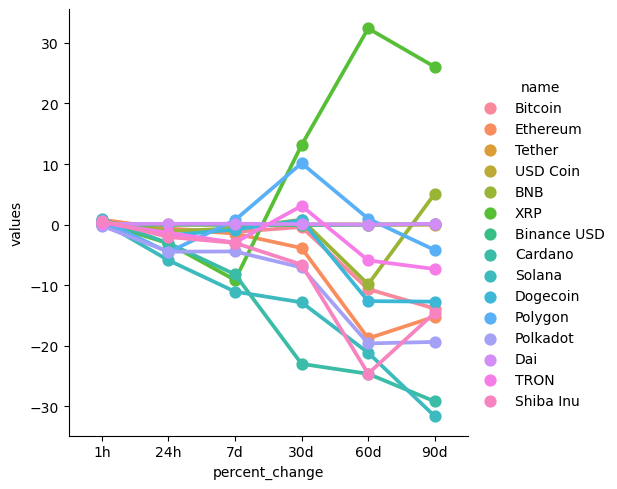

In [19]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')
